Importing Libraries
-------------------

One of the greatest strengths of the python programming language is its rich set of libraries- pre-written code that implements a variety of functionality. For the data scientist, python's libraries (also called "modules") are particularly valuable. With a little bit of research into the details of python's libraries, a lot of common data  tasks are little more than a function call away. Libraries exist for doing data cleaning, analysis, visualization, machine learning and statistics. 

[This XKCD cartoon](http://xkcd.com/353/) pretty much summarizes what Python libraries can do...

<img src="http://imgs.xkcd.com/comics/python.png">

In order to have access to a libraries functionality in a block of code, you must first import it. Importing a library tells python that while executing your code, it should not only consider the code and functions that you have written, but code and functions in the libraries that you have imported.

There are several ways to import modules in python, some have ebetter properties than others. Below we see the preferred general way to import modules. In documentation, you may see other ways to import libraries (`from a_library import foo`). There is no risk to just copying this pattern if it is known to work. 

Imagine I want to import a library called `some_python_library`. This can be done using the import commands. All code below that import statement has access to the library contents.

+ `import some_python_library`: imports the module `some_python_library`, and creates a reference to that module in the current namespace. Or in other words, after you’ve run this statement, you can use `some_python_library.name` to refer to things defined in module `some_python_library`.

+ `import some_python_library as plib`: imports the module `some_python_library` and sets an alias for that library that may be easier to refer to. To refer to a thing defined in the library `some_python_library`, use `plib.name`. 

In practice you'll see the second pattern used very frequently; `pandas` referred to as `pd`, `numpy` referred to as `np`, etc. 

In [1]:
import math
number = 2
math.sqrt(number)

1.4142135623730951

In [2]:
import math as m
m.log(number)

0.6931471805599453

### Example: Matplotlib

Matplotlib is one of the first python libraries a budding data scientist is likely to encounter. Matplotlib is a feature-rich plotting framework, capable of most plots you'll likely need. The interface to the matplotlib module mimics the plotting functionality in Matlab, another language and environment for scientific computing. If you're familiar with Matlab plots, matplotlib will seem very familiar. Even the plots look almost identical. 

Here, we'll cover some basic functionality of matplotlib, line and bar plots and histograms. As with most content convered in this course, this is just scratching the surface. For more info, including many great examples, please consult the [official matplotlib documentation](http://matplotlib.org/). A typical pattern for me when plotting things in python is to find an example that closely mirrors what I'm trying to do, copy this, and tweak until i get things right.

Note: to get plots to appear inline in ipython notebooks, you must invoke the "magic function" `%matplotlib inline`. To have a stand-alone python app plot in a new window, use `plt.show()`.

In most cases, the input to matplotlib plotting functions is arrays of numerical types,  floats or integers. 

In [3]:
# The code below installs the latest version of numpy and matplotlib
!sudo -H pip3 install -U numpy
!sudo -H pip3 install -U matplotlib

  Using cached https://files.pythonhosted.org/packages/35/d5/4f8410ac303e690144f0a0603c4b8fd3b986feb2749c435f7cdbb288f17e/numpy-1.16.2-cp36-cp36m-manylinux1_x86_64.whl
lime 0.1.1.33 has requirement matplotlib==2.1.0, but you'll have matplotlib 3.0.3 which is incompatible.
aif360 0.2.0 has requirement numpy<1.16,>=1.14, but you'll have numpy 1.16.2 which is incompatible.
  Found existing installation: numpy 1.15.4
    Uninstalling numpy-1.15.4:
      Successfully uninstalled numpy-1.15.4
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.0.3)


In [4]:
import matplotlib
matplotlib.__version__

'3.0.3'

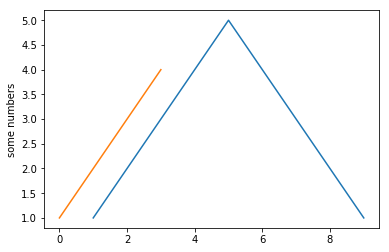

In [5]:
# used to embed plots inside an ipython notebook
%matplotlib inline 
import matplotlib.pyplot as plt

# really simple example:
y = [1,2,3,4,5,4,3,2,1]
x = [1,2,3,4,5,6,7,8,9]
plt.plot(x, y)
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

In [ ]:
import numpy as np

X = np.linspace(0, 10, 101) #create values from 0 to 10, and use 101 values
X

In [ ]:
import numpy as np
import math as math

X = np.linspace(0, 10, 100001) #create values from 0 to 10, and use 10001 values
Y = []

for x in X:
    y = math.sin(x)
    Y.append(y)
    
plt.plot(X, Y, 'mx')
plt.title('The Sine Wave')
plt.xlabel('X')
plt.ylabel('sin(X)')

Notice that most of the functionality in matplotlib that we're using is in the sub-module `matplotlib.pyplot`. 

The third argument (i.e., the `'r-.'`) in the plot function `plt.plot(X, Y, 'r-.')` is a formatting specifier. This defines some properties for a line to be displayed. Some details:
Color characters:

+ `b`: blue

+ `k`: black

+ `r`: red

+ `c`: cyan

+ `m`: magenta

+ `y`: yellow

+ `g`: green

+ `w`: white

Some line/marker formatting specifiers:

+ `-`: solid line style

+ `--`: dashed line style

+ `-.`: dash-dot line style

+ `:`:  dotted line style

+ `.`: point marker

+ `,`: pixel marker

+ `o`: circle marker

+ `+`: plus marker

+ `x`: x marker

There are many other options for plots that can be specified. See [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot) for more info. We will also revisit this topic in the Visualization lectures.

It is possible to plot multiple plots on the same y-axis. In order to do this, the Y data passed into the plot function must be a **list of lists**, each with the same length as the X data that is input:

In [ ]:
Y = []
for x in X:
    y = [math.sin(x), math.cos(x), 0.1*x]
    Y.append(y)

plt.plot(X, Y)
plt.legend(['sin(x)', 'cos(x)', 'x/10'])

It is also possible to just plot Y data without corresponding X values. In this case, the index in the array is assumed to be X.

In [ ]:
plt.plot(Y)
plt.xlabel('index')
plt.ylabel('f(x)')
plt.legend(['sin(x)', 'cos(x)', 'x/10'])

Alternately, multiple calls to plot can be made with differing data. Doing so overlays the subsequent plots, creating the same effect.

In [ ]:
Y = []
Z = []
for x in X:
    Y.append(math.sin(x))
    Z.append(math.cos(x))
    
plt.plot(X, Y, 'b-.')
plt.plot(X, Z, 'r--')
plt.legend(['sin(x)', 'cos(x)'])

### Bar Plots

Bar plots are often a good way to compare data in categories. This is an easy matter with matplotlib, the interface is almost identical to the that used when making line plots. 

In [ ]:
vals = [7, 6.2, 3, 5, 9]
xval = [1, 2, 3, 4, 5]
plt.bar(xval, vals)


### Histograms

Histograms are extremely useful for analyzing data. Histograms partition numerical data into a discrete number of buckets (called bins), and return the number of values within each bucket. Typically this is displayed as a bar plot.

In [ ]:
Y = []
for x in range(0,100000):
    Y.append(np.random.randn())
    
plt.hist(Y, 50)